Short Backwarding for Selecting the Best Historical Agent in a Consulting System for Portfolio Allocation with Deep Reinforcement Learning

## 7.0 Uniform Weights and Maximum Sharpe Strategies
---
We present two allocation strategies which will be used for comparision with the proposed Deep Reinforcement Learning (DRL) methodology.

The two strategies are:

1. Uniform Weights Strategy. This is a naive method where the weights of the assets are distributed equally among the assets in the portfolio.

2. Maximum Sharpe Strategy. This is an optimization strategy where the allocation is based on achieving the maximum possible risk based return (Sharpe Ratio). We will make use of the PyPotfolioOpt Library which is a library that implements portfolio optimisation methods.

### 7.1 Import Relevant Packages

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
from IPython.display import display, HTML
from datetime import datetime

In [30]:
#from pypfopt.efficient_frontier import EfficientFrontier, objective_functions
from pypfopt.efficient_frontier import EfficientFrontier
#from pypfopt.objective_functions import objective_functions

from pypfopt import risk_models
from pypfopt import expected_returns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### 7.2 Load the Train and Test Data for Close Prices

In [31]:
%store -r prices_full_train_df
%store -r prices_full_test_df

In [32]:
prices_train_df = prices_full_train_df.copy()
prices_test_df = prices_full_test_df.copy()

In [33]:
prices_train_df = prices_train_df.reset_index(drop=True).set_index(['date'])
prices_test_df = prices_test_df.reset_index(drop=True).set_index(['date'])

In [34]:
prices_train_df.head()

,MCD,CVX,DD,PG,UNH,V,WBA,RTX,INTC,VZ,...,AAPL,GS,IBM,TRV,HD,CAT,XOM,DIS,KO,BA
date,,,,,,,,,,,,,,,,,,,,,
2008-03-19,34.153214,43.431351,32.355705,42.133186,28.681099,12.605218,22.749361,29.209345,13.014488,14.425960,...,3.915352,127.940323,64.913177,31.375137,17.912857,47.481430,46.908859,26.417377,18.233225,54.094543
2008-03-20,34.636936,44.131432,32.417919,43.102497,28.495552,14.356561,22.999493,29.315552,13.421770,14.832500,...,4.024055,138.037750,65.684776,32.308086,18.727085,47.539391,47.225548,26.975491,18.561644,55.088791
2008-03-24,35.496170,44.555729,33.466522,43.475304,28.810194,13.325832,24.143843,29.880541,13.656266,15.181546,...,4.213072,137.461456,66.089973,32.240482,19.527952,48.962620,47.753334,27.093884,18.604212,56.186138
2008-03-25,35.769848,44.836826,33.644249,43.208118,28.463276,14.111155,23.768646,29.804058,13.742652,15.152799,...,4.256853,138.037750,65.484924,32.287811,19.194254,49.355450,47.336636,27.127707,18.674158,55.898918
2008-03-26,35.387978,45.059536,33.599819,43.270256,27.511274,14.269550,23.737381,29.570433,13.489651,14.840708,...,4.380049,134.848679,64.896484,32.145817,18.793810,49.819118,47.925571,26.857107,18.595097,56.193501


In [35]:
prices_test_df.head()

,MCD,CVX,DD,PG,UNH,V,WBA,RTX,INTC,VZ,...,AAPL,GS,IBM,TRV,HD,CAT,XOM,DIS,KO,BA
date,,,,,,,,,,,,,,,,,,,,,
2021-03-29,212.677490,93.709915,73.799377,126.847038,363.462372,209.479523,44.685383,71.746124,59.035702,48.619080,...,119.147736,301.352997,111.609779,144.124756,281.013641,215.272842,50.269238,184.249512,49.169182,250.520004
2021-03-30,210.460419,92.842239,74.007263,124.892265,358.188690,206.930740,44.795300,71.875435,58.367546,48.420738,...,117.685257,307.162994,110.673248,144.293411,283.449982,217.947174,49.647446,184.927307,48.530033,252.009995
2021-03-31,209.674652,91.843086,73.024529,124.873817,356.759918,206.764725,46.418682,71.367447,58.578064,48.057106,...,119.893684,302.527954,109.473854,140.892883,283.849823,216.815735,48.894283,183.920593,48.128273,254.720001
2021-04-01,210.675568,92.684479,73.827705,123.813446,351.965698,211.774414,46.291855,71.376678,59.081474,48.181068,...,120.727989,303.120026,109.449211,141.098984,286.174561,217.629257,50.260483,188.356125,47.945652,252.960007
2021-04-05,214.080688,91.597679,73.355240,125.814316,354.947723,213.903305,48.025162,71.958549,60.902885,48.652134,...,123.574432,299.326843,111.667282,142.419815,293.288208,218.536270,49.481041,187.887650,48.219585,259.359985


### 7.3 Uniform Weights Portfolio

In [36]:
# Define a Function for Displaying the Cleaned Weights
def show_clean_p(port_df):
    p1_show_1 = (port_df.transpose()[0]).map(lambda x: "{:.3%}".format(x)).to_frame().transpose()
    return display(HTML(p1_show_1.to_html()))

In [37]:
ticker_list = list(prices_train_df.columns) # Get List of all ticker symbols
n_assets = len(ticker_list) # Number of assets

uniform_weights = np.ones((n_assets))/n_assets

uniform_weights_port = pd.DataFrame([uniform_weights], columns = ticker_list)

print("\nuniform weights portfolio:\n")
show_clean_p(uniform_weights_port)


uniform weights portfolio:



,MCD,CVX,DD,PG,UNH,V,WBA,RTX,INTC,VZ,WMT,JNJ,AXP,MRK,PFE,JPM,CSCO,NKE,MSFT,MMM,AAPL,GS,IBM,TRV,HD,CAT,XOM,DIS,KO,BA
0,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%,3.333%


In [38]:
uniform_weights

array([0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333,
       0.03333333, 0.03333333, 0.03333333, 0.03333333, 0.03333333])

In [39]:
# Plotting the Daily Draw Down

ticker_symb = ['AAPL']
prices = prices_train_df[ticker_symb]
window = 250

def get_daily_max_drawdown(prices, window):
    max_rolling = prices.rolling(min_periods=1, window=window).max()
    daily_drawdown = (prices / max_rolling) - 1
    max_daily_drawdown = daily_drawdown.rolling(min_periods=1, window=window).min()
    return daily_drawdown,max_daily_drawdown

max_rolling = prices.rolling(min_periods=1, window=window).max()

daily_drawdown, max_daily_drawdown = get_daily_max_drawdown(prices, window)
daily_drawdown.name = "{} daily drawdown".format(ticker_symb) 
#daily_drawdown = pd.DataFrame(daily_drawdown)

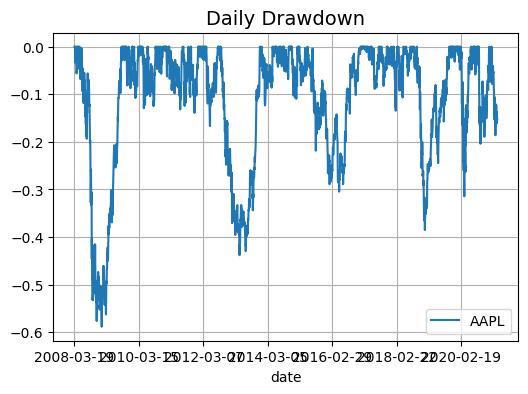

In [40]:
fig, ax = plt.subplots(figsize=(6,4))
daily_drawdown.plot(ax=ax);
ax.set_title("Daily Drawdown", fontsize=14)
plt.legend(loc="best");
plt.grid(True)
plt.show()

fig.savefig('results/daily_drawdown.png');

In [41]:
# Using the average daily return to calculate portfolio return

returns = prices_train_df.pct_change() # get the assets daily returns
mean_daily_returns = returns.mean().values

uw_returns = np.dot(mean_daily_returns, uniform_weights)

print("uniform weights portfolio average daily return = {:.4%}".format(uw_returns))

uniform weights portfolio average daily return = 0.0620%


In [42]:
#Annualized Return, Variance and Standard Deviation

def get_annualized_return(prices, weigths):
    #months = (pd.to_datetime(prices_train_df.index)[-1] - pd.to_datetime(prices_train_df.index)[0]) / np.timedelta64(1, 'M')
    months = (pd.to_datetime(prices_train_df.index)[-1] - pd.to_datetime(prices_train_df.index)[0]).days / 30.44

    months = np.floor(months)
    total_return = (prices.iloc[-1].dot(weigths) - prices.iloc[0].dot(weigths)) / prices.iloc[0].dot(weigths)
    annualized_return = ((1 + total_return) ** (12 / months)) - 1
    return annualized_return


uw_annual_return = get_annualized_return(prices_train_df, uniform_weights)

def get_portfolio_variance(returns, weigths):
    covariance_returns = returns.cov() * 250
    return np.dot(weigths.T, np.dot(covariance_returns, weigths))

uw_var = get_portfolio_variance(returns, uniform_weights)

print("uniform weights portfolio annualized return = {:.4%}".format(uw_annual_return))
print("uniform weights portfolio annualized variance = {:.1%}".format(uw_var))
print("uniform weights portfolio annualized std = {:.1%}".format(np.sqrt(uw_var)))

uniform weights portfolio annualized return = 11.9934%
uniform weights portfolio annualized variance = 4.2%
uniform weights portfolio annualized std = 20.5%


In [43]:
# Sharpe ratio

uniform_returns = returns.dot(uniform_weights)

rfr = 0.04 #Risk free rate

uw_vol = uniform_returns.std() * np.sqrt(250)

uw_sharpe_ratio = ((uw_annual_return  - rfr) / uw_vol)

print("uniform weights portfolio sharpe ratio = {:.2f}".format(uw_sharpe_ratio))

uniform weights portfolio sharpe ratio = 0.39


date
2008-03-19         NaN
2008-03-20    1.028762
2008-03-24    1.043077
2008-03-25    1.043980
2008-03-26    1.034390
                ...   
2021-03-22    5.720395
2021-03-23    5.665448
2021-03-24    5.671884
2021-03-25    5.712053
2021-03-26    5.801009
Name: portifolio 1: uniform weights, Length: 3279, dtype: float64


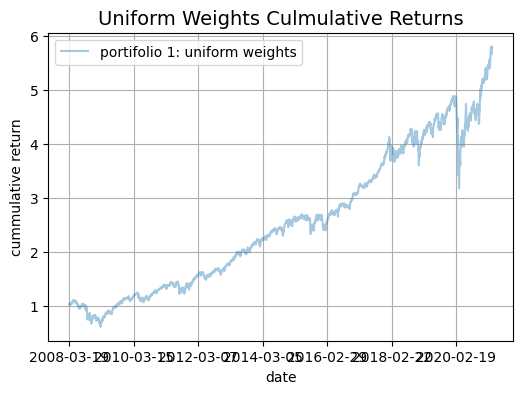

In [44]:
# Plotting the cummulative return
uniform_cum_returns = (1 + uniform_returns).cumprod()
uniform_cum_returns.name = "portifolio 1: uniform weights"

fig, ax = plt.subplots(figsize=(6,4))
uniform_cum_returns.plot(ax=ax, alpha=0.4);

plt.legend(loc="best");
plt.grid(True)
ax.set_ylabel("cummulative return");
print(uniform_cum_returns);
ax.set_title('Uniform Weights Culmulative Returns', fontsize=14)

fig.savefig('results/uniform_weights_portfolio.png');

### 7.4 Maximum Sharpe Portfolio
---
We use PyPortfolioOpt library to get the weights for the Maximum Sharpe Portfolio

In [45]:
# mu = expected_returns.mean_historical_return(prices_train_df)
# Sigma = risk_models.sample_cov(prices_train_df)
# ef = EfficientFrontier(mu,Sigma)
# ef.add_objective(objective_functions.L2_reg, gamma=1)

from pypfopt import expected_returns, risk_models, EfficientFrontier, objective_functions
import pandas as pd  # Assuming you are using pandas

# Your other code remains unchanged

mu = expected_returns.mean_historical_return(prices_train_df)
Sigma = risk_models.sample_cov(prices_train_df)
ef = EfficientFrontier(mu, Sigma)
ef.add_objective(objective_functions.L2_reg, gamma=1)


raw_weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
max_sharpe_portfolio = pd.DataFrame(cleaned_weights, index=[0])

print("max sharpe portfolio:")
show_clean_p(max_sharpe_portfolio)

_ = ef.portfolio_performance(verbose=True, risk_free_rate=rfr)

print()




max sharpe portfolio:


d:\Users\nice\anaconda3\envs\rein\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


,MCD,CVX,DD,PG,UNH,V,WBA,RTX,INTC,VZ,WMT,JNJ,AXP,MRK,PFE,JPM,CSCO,NKE,MSFT,MMM,AAPL,GS,IBM,TRV,HD,CAT,XOM,DIS,KO,BA
0,5.918%,0.000%,0.000%,2.060%,8.506%,10.324%,0.000%,0.000%,2.475%,2.592%,3.360%,3.382%,0.700%,1.310%,1.778%,1.666%,0.000%,7.656%,7.908%,2.369%,14.167%,0.000%,0.000%,2.803%,10.289%,2.200%,0.000%,5.149%,1.360%,2.019%


Expected annual return: 19.1%
Annual volatility: 20.5%
Sharpe Ratio: 0.83



d:\Users\nice\anaconda3\envs\rein\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


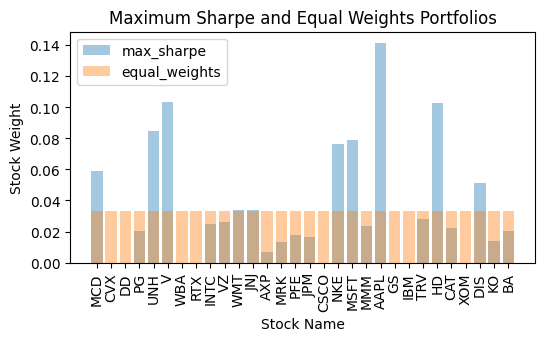

In [46]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(6,3))
plt.title('Maximum Sharpe and Equal Weights Portfolios')
plt.bar(max_sharpe_portfolio.T.index, max_sharpe_portfolio.T[0], alpha=0.4, label='max_sharpe')
plt.bar(uniform_weights_port.T.index, uniform_weights_port.T[0], alpha=0.4, label='equal_weights')
plt.xlabel('Stock Name')
plt.ylabel('Stock Weight')
plt.xticks(rotation=90)
plt.legend()

# ذخیره نمودار به صورت PNG با کیفیت بالا
plt.savefig('portfolio_chart.png', format='png', dpi=300, bbox_inches='tight')

plt.show()


In [47]:
prices_train_df.head()

,MCD,CVX,DD,PG,UNH,V,WBA,RTX,INTC,VZ,...,AAPL,GS,IBM,TRV,HD,CAT,XOM,DIS,KO,BA
date,,,,,,,,,,,,,,,,,,,,,
2008-03-19,34.153214,43.431351,32.355705,42.133186,28.681099,12.605218,22.749361,29.209345,13.014488,14.425960,...,3.915352,127.940323,64.913177,31.375137,17.912857,47.481430,46.908859,26.417377,18.233225,54.094543
2008-03-20,34.636936,44.131432,32.417919,43.102497,28.495552,14.356561,22.999493,29.315552,13.421770,14.832500,...,4.024055,138.037750,65.684776,32.308086,18.727085,47.539391,47.225548,26.975491,18.561644,55.088791
2008-03-24,35.496170,44.555729,33.466522,43.475304,28.810194,13.325832,24.143843,29.880541,13.656266,15.181546,...,4.213072,137.461456,66.089973,32.240482,19.527952,48.962620,47.753334,27.093884,18.604212,56.186138
2008-03-25,35.769848,44.836826,33.644249,43.208118,28.463276,14.111155,23.768646,29.804058,13.742652,15.152799,...,4.256853,138.037750,65.484924,32.287811,19.194254,49.355450,47.336636,27.127707,18.674158,55.898918
2008-03-26,35.387978,45.059536,33.599819,43.270256,27.511274,14.269550,23.737381,29.570433,13.489651,14.840708,...,4.380049,134.848679,64.896484,32.145817,18.793810,49.819118,47.925571,26.857107,18.595097,56.193501


### 7.5 Store the Data Frames

In [48]:
%store max_sharpe_portfolio
%store uniform_weights_port

%store prices_train_df
%store prices_test_df

Stored 'max_sharpe_portfolio' (DataFrame)
Stored 'uniform_weights_port' (DataFrame)
Stored 'prices_train_df' (DataFrame)
Stored 'prices_test_df' (DataFrame)


In [49]:
max_sharpe_portfolio

,MCD,CVX,DD,PG,UNH,V,WBA,RTX,INTC,VZ,...,AAPL,GS,IBM,TRV,HD,CAT,XOM,DIS,KO,BA
0,0.05918,0.0,0.0,0.0206,0.08506,0.10324,0.0,0.0,0.02475,0.02592,...,0.14167,0.0,0.0,0.02803,0.10289,0.022,0.0,0.05149,0.0136,0.02019


In [50]:
returns_train = prices_train_df.pct_change()  # get the assets daily returns
returns_test = prices_test_df.pct_change()

# get the culmulative returns for each portfolio
uw_weights = uniform_weights_port.values.flatten()
uw_returns = returns_train.dot(uw_weights)
uw_cum_returns = (1 + uw_returns).cumprod()

In [51]:
uw_cum_returns

date
2008-03-19         NaN
2008-03-20    1.028762
2008-03-24    1.043077
2008-03-25    1.043980
2008-03-26    1.034390
                ...   
2021-03-22    5.720395
2021-03-23    5.665448
2021-03-24    5.671884
2021-03-25    5.712053
2021-03-26    5.801009
Length: 3279, dtype: float64

In [52]:
max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_returns = returns_train.dot(max_sharpe_weights)
max_sharpe_cum_returns = (1 + max_sharpe_returns).cumprod()

In [53]:
max_sharpe_cum_returns

date
2008-03-19          NaN
2008-03-20     1.039638
2008-03-24     1.051569
2008-03-25     1.056033
2008-03-26     1.048816
                ...    
2021-03-22    12.272356
2021-03-23    12.222645
2021-03-24    12.166023
2021-03-25    12.193095
2021-03-26    12.382654
Length: 3279, dtype: float64

In [54]:
uw_weights = uniform_weights_port.values.flatten()
uw_test_returns = returns_test.dot(uw_weights)
uw_test_cum_returns = (1 + uw_test_returns).cumprod()
uw_test_cum_returns.name = "portfolio: uniform weights"

max_sharpe_weights = max_sharpe_portfolio.values.flatten()
max_sharpe_test_returns = returns_test.dot(max_sharpe_weights)
max_sharpe_test_cum_returns = (1 + max_sharpe_test_returns).cumprod()

In [55]:
uw_test_cum_returns

date
2021-03-29         NaN
2021-03-30    0.995743
2021-03-31    0.993119
2021-04-01    0.998176
2021-04-05    1.008885
                ...   
2024-03-22    1.254868
2024-03-25    1.252746
2024-03-26    1.250080
2024-03-27    1.268757
2024-03-28    1.273214
Name: portfolio: uniform weights, Length: 756, dtype: float64

In [56]:
max_sharpe_test_cum_returns

date
2021-03-29         NaN
2021-03-30    0.993540
2021-03-31    0.995340
2021-04-01    1.002046
2021-04-05    1.018027
                ...   
2024-03-22    1.277923
2024-03-25    1.270911
2024-03-26    1.267799
2024-03-27    1.283160
2024-03-28    1.282527
Length: 756, dtype: float64